# Import Library

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [8]:
from sklearn.metrics import plot_confusion_matrix

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

In [ ]:
Predict whether a person has diabetes or not 

# Data Gathering

In [13]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [15]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Selection

# Feature Engineering

# Model Building

In [18]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1, stratify = y)
#stratify : sorting data, people, and objects into distinct groups or layers

In [19]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
500/(500+268)

0.6510416666666666

In [21]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [22]:
375/(375+201)

0.6510416666666666

In [23]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [24]:
125/(125+67)

0.6510416666666666

# Model Training

In [25]:
#create Instance
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

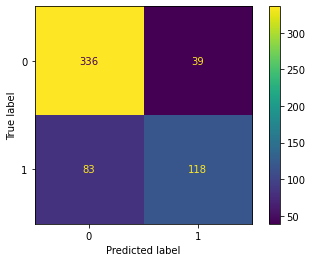

In [26]:
#Training Data
plot_confusion_matrix(model, x_train, y_train)

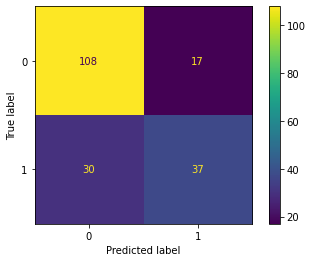

In [27]:
#Testing Data
plot_confusion_matrix(model, x_test, y_test)

In [28]:
#Training Accuracy
model.score(x_train, y_train)

0.7881944444444444

In [29]:
#testing Accuracy
model.score(x_test, y_test)

0.7552083333333334

# Model Evaluation

In [30]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [31]:
y_pred_train = model.predict(x_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.91636267, 0.08363733],
       [0.32428013, 0.67571987],
       [0.74017864, 0.25982136],
       [0.46076794, 0.53923206],
       [0.87524548, 0.12475452],
       [0.9781938 , 0.0218062 ],
       [0.10279795, 0.89720205],
       [0.1903076 , 0.8096924 ],
       [0.05624062, 0.94375938],
       [0.99751194, 0.00248806],
       [0.1577149 , 0.8422851 ],
       [0.54536834, 0.45463166],
       [0.91238787, 0.08761213],
       [0.283241  , 0.716759  ],
       [0.57008621, 0.42991379],
       [0.87831789, 0.12168211],
       [0.48520573, 0.51479427],
       [0.93661324, 0.06338676],
       [0.45232157, 0.54767843],
       [0.89634948, 0.10365052],
       [0.93461294, 0.06538706],
       [0.80408352, 0.19591648],
       [0.84465042, 0.15534958],
       [0.81671133, 0.18328867],
       [0.87760845, 0.12239155],
       [0.22831292, 0.77168708],
       [0.36399675, 0.63600325],
       [0.94689241, 0.05310759],
       [0.63962909, 0.36037091],
       [0.61420653, 0.38579347],
       [0.

In [ ]:
# first 5 class probability, threshold value = 0.5 by default


[    0     ,      1    ]
[0.91636267, 0.08363733], >> 0
[0.32428013, 0.67571987], >> 1
[0.74017864, 0.25982136], >> 0
[0.46076794, 0.53923206], >> 1
[0.87524548, 0.12475452], >> 0

In [32]:
#Testing Data

y_pred = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

print("*"*45)

accaracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:\n", accaracy)

print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("classification_report:\n", clf_report)

Confusion Matrix:
 [[108  17]
 [ 30  37]]
*********************************************
Accuracy Score:
 0.7552083333333334
*********************************************
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.69      0.55      0.61        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [33]:
#Training Data

y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

print("*"*45)

accaracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:\n", accaracy)

print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("classification_report:\n", clf_report)

Confusion Matrix:
 [[336  39]
 [ 83 118]]
*********************************************
Accuracy Score:
 0.7881944444444444
*********************************************
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       375
           1       0.75      0.59      0.66       201

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [34]:
#Weighted Average 
#Precision
(0.80 * 0.65)+(0.75 * 0.35)

0.7825

In [35]:
#Weighted Average 
#Recall
(0.90 * 0.65)+(0.59 * 0.35)

0.7915000000000001

In [36]:
# Accuracy = TP+TN/(TP+TN+FP+FN)

Accuracy = (118+336)/(118+336+83+39)
Accuracy

0.7881944444444444

In [ ]:
Confusion Matrix:
Predicted Values
[[336  39]     Actual Values
 [ 83 118]]    Actual Values

TN = 336
FP = 39
FN = 83
TP = 118

In [37]:
# Precision for class 1 --> We are considering class 1 i.e. Positive class
# Precision = TP/(TP+FP)
Precision_1 = 118/(118+39)
Precision_1

0.7515923566878981

In [38]:
# Precision for class 0 --> We are considering class 0 i.e. Negative class
# Precision = TN/(TN+FN)
Precision_1 = 336/(336+83)
Precision_1

0.801909307875895

# AUC-ROC Curve

In [39]:
# Prediction Probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # we are getting class 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.99272553, 0.99272553, 0.97542289, 0.96591652, 0.95922174,
       0.91750858, 0.91653835, 0.90790654, 0.89684045, 0.81404227,
       0.8056952 , 0.79994735, 0.79729249, 0.77792583, 0.77731446,
       0.77282899, 0.76974989, 0.76622724, 0.76444426, 0.76339967,
       0.75949177, 0.75692479, 0.75065229, 0.74135654, 0.73190355,
       0.72943527, 0.72934918, 0.71544862, 0.71069171, 0.69338436,
       0.68828441, 0.68281595, 0.67944581, 0.67216837, 0.66874108,
       0.66569689, 0.66308985, 0.64849259, 0.64827152, 0.63825982,
       0.63457558, 0.6290556 , 0.6166219 , 0.61119774, 0.60701154,
       0.59989203, 0.59164584, 0.58768307, 0.58485243, 0.58039752,
       0.57596259, 0.55404803, 0.55322821, 0.53787721, 0.53663669,
       0.53061605, 0.52928549, 0.51346379, 0.51140976, 0.51017869,
       0.50621615, 0.50350169, 0.49851434, 0.49777746, 0.49324985,
       0.49219427, 0.48504662, 0.48206973, 0.47928012, 0.47685857,
       0.47639108, 0.46303398, 0.45996874, 0.4527099 , 0.44428

Text(0.5, 1.0, 'Receiver Operating Characteristics')

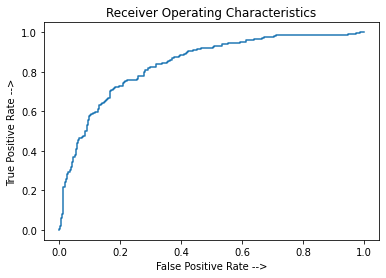

In [40]:
# Plot AUC-ROC 
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Receiver Operating Characteristics")

In [41]:
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # we are getting class 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
np.where(thresh >= 0.4999999)
thresh[61]

0.50350168621213

In [42]:
fpr[61]

0.104

In [43]:
tpr[61]

0.5870646766169154

In [44]:
# [[336  39
#  [83  118]]
    
TP = 118
TN = 336
FP = 39
FN = 83

fpr = FP/(FP+TN)
fpr = 39/(39+336)
fpr

0.104

In [45]:
tpr = TP/(TP+FN)
tpr = 118/118+83
tpr

84.0

In [46]:
# Calculate AUC

In [47]:
auc_value = roc_auc_score(y_train, y_pred_proba[:,1])
auc_value

0.8404112769485904

# Predict on Single Row

In [49]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [50]:
Glucose = 188.000
BloodPressure = 55.000
SkinThickness = 25.000
Insulin = 0.000
BMI = 25.600
DiabetesPedigreeFunction = 0.52
Age = 45

In [51]:
columns = x.columns
columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [52]:
project_data = {'column':list(columns)}
project_data

{'column': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [53]:
array = np.zeros(len(project_data["column"]), dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0])

In [54]:
array[0] = Glucose
array[1] = BloodPressure
array[2] = SkinThickness
array[3] = Insulin
array[4] = BMI
array[5] = DiabetesPedigreeFunction
array[6] = Age
array

array([188,  55,  25,   0,  25,   0,  55])

In [56]:
Diabetes_pred = model.predict([array])[0]
Diabetes_pred

1

In [58]:
#create pickle and json file

import pickle
import json 

with open('diabetes_data.pkl', 'wb')as f:
    pickle.dump(model, f)
    
with open("project_data.json", 'w')as f:
    json.dump(project_data, f)